# Comparison of Vesta Spread Models

In [1]:
from src.pyropy import weatherdata as ppw
from src.pyropy import firebehaviour as ppf
from src.pyropy import spreadmodels as pps
weather = ppw.gridded_to_df('tests/.data/weather_gridded_in.csv')
incident = ppf.Incident(weather)
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7    17   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7    15   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7    14   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7    17   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7    24   

   gfdi  
0     1  
1     1  
2     1  
3     2  
4     4  


In [2]:
xl_fn = 'tests/.data/FireBehaviourCalcs_Test.xlsm'
incident.compare_fbcalc(xl_fn, ['mk5','vesta', 'vesta2', 'mc_v2', 'mc_v'])

C:\Users\geoffg\.conda\envs\firebehaviour310\lib\site-packages\openpyxl\reader\drawings.py:59: UserWarning: wmf image format is not supported so the image is being dropped
  warn(msg)


In [3]:
incident.compare_amicus('tests/.data/amicus_vesta.csv', 'vesta')
incident.compare_amicus('tests/.data/amicus_vesta2.csv', 'vesta2')
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7  15.3   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7  14.0   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7  13.2   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7  15.9   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7  21.9   

   gfdi  fros_mk5_fbcalc  fros_mk5  ...  vesta2_p2    vesta2_r2  vesta2_p3  \
0     1              274       275  ...   0.999671   645.321018   0.001693   
1     1              251       252  ...   0.998093   540.443385   0.000617   
2     1              237       237  ...   0.999332   597.264286   0.000349   
3     2              286       286  ...   0.999996   869.478202   0.005685   
4     4              393       394  ...   1.000000  1126.472291   0.121484   

     vesta2_r3  fros_vesta2  mc_v_fbcalc  mc_v2_fbcalc  mc_ami

In [7]:
incident.run_forest_vesta_08()
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7  15.3   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7  14.0   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7  13.2   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7  15.9   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7  21.9   

   gfdi  fros_mk5_fbcalc  fros_mk5  ...    vesta2_r2  vesta2_p3    vesta2_r3  \
0     1              274       275  ...   645.321018   0.001693  1123.313247   
1     1              251       252  ...   540.443385   0.000617   871.982164   
2     1              237       237  ...   597.264286   0.000349  1039.660674   
3     2              286       286  ...   869.478202   0.005685  1781.732214   
4     4              393       394  ...  1126.472291   0.121484  2526.382705   

   fros_vesta2  mc_v_fbcalc  mc_v2_fbcalc  mc_amic

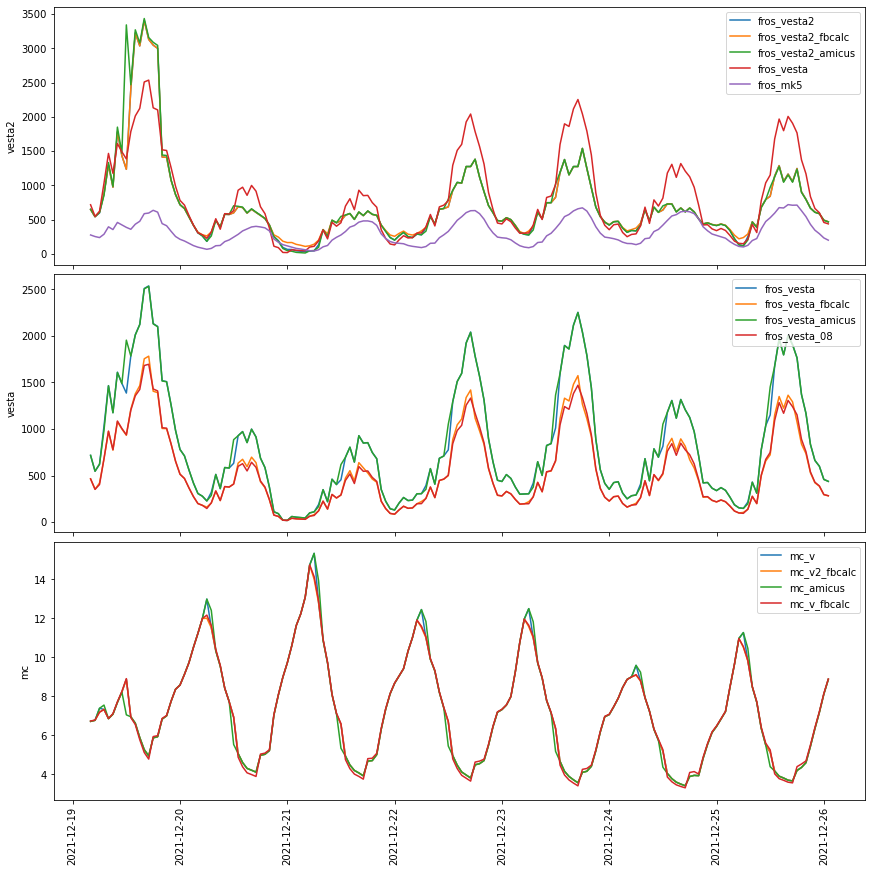

In [8]:
import matplotlib.pyplot as plt
fig, (ax_vesta2, ax_vesta, ax_mc) = plt.subplots(3,1, sharex=True,constrained_layout=True, figsize=(12,12))

ax_dict = {
    'vesta2': [ax_vesta2, 'fros_vesta2', 'fros_vesta2_fbcalc', 'fros_vesta2_amicus', 'fros_vesta', 'fros_mk5'],
    'vesta': [ax_vesta, 'fros_vesta', 'fros_vesta_fbcalc', 'fros_vesta_amicus', 'fros_vesta_08'],
    'mc': [ax_mc, 'mc_v', 'mc_v2_fbcalc','mc_amicus','mc_v_fbcalc']
}

for label, val in ax_dict.items():
    for col in val[1:]:
        val[0].plot(incident.df['date_time'],incident.df[col], label=col)
    val[0].set_ylabel(label)

ax_vesta2.legend(loc='upper right')
ax_vesta.legend(loc='upper right')
ax_mc.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [6]:
incident.df.to_csv('test')